In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [36]:
train = pd.read_csv('data/raw/train.csv')
train.columns = ['abv', 'company', 'food', 'glassware', 'id', 'number_ratings', 'style', 'cell_temp', 'serving_temp', 'score']
train.head()

,abv,company,food,glassware,id,number_ratings,style,cell_temp,serving_temp,score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


## Data Preprocessing

### Handling Empty Values

In [3]:
print(train.shape)
train.isnull().sum()

(185643, 10)


abv               15130
company               0
food                  0
glassware             0
id                    0
number_ratings        0
style                 0
cell_temp          6781
serving_temp        193
score                 0
dtype: int64

<h4>Currently using a simple strategy to interploate empty values</h4>
<p> 1. Substitute average for ABV </p>
<p> 2. Most frequent cellar temperature </p>
<p> 3. Most frequent serving temperature </p>

In [37]:
print(train.abv.mean())
train.abv[train.abv.isnull()] = train.abv.mean()

6.354960736131254


In [38]:
print(train.serving_temp.value_counts().idxmax())
train.serving_temp[train.serving_temp.isnull()] = train.serving_temp.value_counts().idxmax()

45-50


In [39]:
print(train.cell_temp.value_counts().idxmax())
train.cell_temp[train.cell_temp.isnull()] = train.cell_temp.value_counts().idxmax()

40-45


### Converting variables to useful format

## Exploratory Analysis 

In [40]:
# The number_ratings feature is in text because some of the rows are like '1,000'
# Remove ','
train.number_ratings = train.number_ratings.apply(lambda x: x.replace(",", ""))
train.number_ratings = pd.to_numeric(train.number_ratings)

In [41]:
# Processing the foold and glassware features
# Remove eveyything between parantheses
train['food'] = train.food.str.replace(r"\(.*\)","")
train['glassware'] = train.glassware.str.replace(r"\(.*\)","")

In [43]:
train_glass = train.glassware.str.split('\s*,\s*', expand=True).stack().str.get_dummies().sum(level=0)
train_glass.columns = ['glass_' + str(col).lower()  for col in train_glass.columns]
train_glass.head()

,glass_flute,glass_goblet,glass_mug,glass_none,glass_oversizedwineglass,glass_pilsenerglass,glass_pintglass,glass_snifter,glass_stange,glass_tulip,glass_weizenglass,glass_yet
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


### Univariate Analysis 

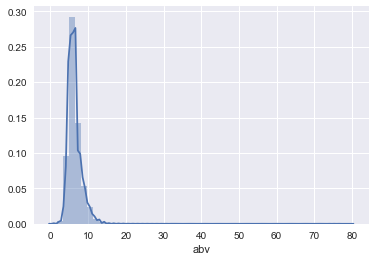

In [8]:
sns.distplot(train.abv)

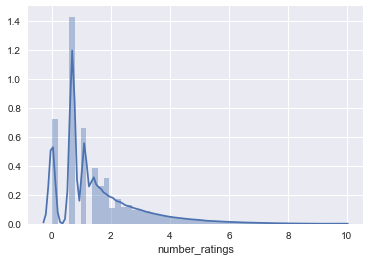

In [22]:
sns.distplot(np.log(train.number_ratings + 1))